In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dataset = pd.read_csv('/content/housing.csv')

dataset = dataset.dropna()

dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
ds = dataset.copy()
ds = dataset.drop(columns=['ocean_proximity'])
ds = ds[:18]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f817a0b0400>,
      dtype=object)

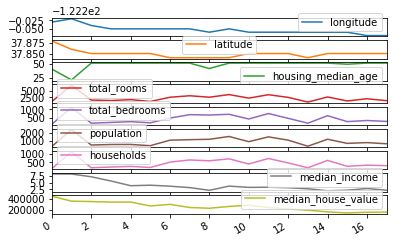

In [12]:
ds.plot(subplots=True)

In [0]:
Y = dataset['median_house_value']

X = dataset.loc[:, 'longitude' : 'median_income']

In [0]:
X.shape

(20433, 8)

In [0]:
Y.shape

(20433,)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2003, shuffle = True)

np.random.seed(4)

x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [0]:
import torch
from torch.nn import BatchNorm1d
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu, dropout
from torch.utils.data import DataLoader, TensorDataset

In [0]:
# Initial Architecture for Literature Review

class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs =outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)

    self.max_pooling_layer = MaxPool1d(1) # Constructor value:  Kernel size = 1

    self.conv_layer = Conv1d(batch_size, 128, 1)
    
    self.flatten_layer = Flatten()

    self.liner_layer = Linear(128, 128)

    self.output_layer = Linear(128, outputs)

  def feed(self, input):

    input = input.reshape((self.batch_size, self.inputs, 1))  #single dimension for tabular data (expects 3D data(image))

    output = relu(self.input_layer(input))

    output = self.max_pooling_layer(output)

    output = relu(self.conv_layer(output))

    output = self.flatten_layer(output)

    output = self.liner_layer(output)

    output = self.output_layer(output)

    return output

In [0]:
# Proposed Architecture

class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs =outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)

    self.normalization_layer = BatchNorm1d(num_features = 128)

    self.conv_layer = Conv1d(batch_size, 128, 1)

    self.max_pooling_layer = MaxPool1d(1) # Constructor value:  Kernel size = 1
    
    self.flatten_layer = Flatten()

    self.liner_layer = Linear(128, 128)

    # self.liner_layer2 = Linear(128, 64)

    self.output_layer = Linear(128, outputs)

  def feed(self, input):

    input = input.reshape((self.batch_size, self.inputs, 1))

    output = relu(self.normalization_layer(self.input_layer(input)))

    output = relu(self.conv_layer(output))

    # output = relu(dropout(self.conv_layer(output), p = 0.2))

    output = self.max_pooling_layer(output)

    output = self.flatten_layer(output)

    output = self.liner_layer(output)

    output = self.liner_layer(output)

    # output = dropout(self.liner_layer(output), p = 0.5)

    output = self.output_layer(output)

    return output

In [0]:
# 2 Layers

class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs =outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)

    self.max_pooling_layer = MaxPool1d(1) # Constructor value:  Kernel size = 1

    self.conv_layer = Conv1d(batch_size, 256, 1)

    self.conv_layer2 = Conv1d(256, 128, 1)

    self.flatten_layer = Flatten()

    self.liner_layer = Linear(128, 64)

    self.output_layer = Linear(64, outputs)

  def feed(self, input):

    input = input.reshape((self.batch_size, self.inputs, 1))  #single dimension for tabular data (expects 3D data(image))

    output = relu(self.input_layer(input))

    output = relu(self.conv_layer(output))

    output = relu(self.conv_layer2(output))

    output = self.max_pooling_layer(output)

    output = self.flatten_layer(output)

    output = self.liner_layer(output)

    # output = dropout(self.liner_layer(output), p = 0.5)

    output = self.output_layer(output)

    return output

In [0]:
'''
# 3 Layers

class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs =outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)

    self.normalization_layer = BatchNorm1d(num_features = 128)

    self.max_pooling_layer = MaxPool1d(1) # Constructor value:  Kernel size = 1

    self.conv_layer = Conv1d(batch_size, 128, 1)

    self.conv_layer2 = Conv1d(128, 128, 1)

    self.conv_layer3 = Conv1d(128, 128, 1)

    self.max_pooling_layer = MaxPool1d(1) # Constructor value:  Kernel size = 1

    self.flatten_layer = Flatten()

    self.liner_layer = Linear(128, 128)

    self.output_layer = Linear(128, outputs)

  def feed(self, input):

    input = input.reshape((self.batch_size, self.inputs, 1))  #single dimension for tabular data (expects 3D data(image))

    output = relu(self.normalization_layer(self.input_layer(input)))

    output = self.max_pooling_layer(output)

    output = relu(self.conv_layer(output))

    output = relu(self.conv_layer2(output))

    output = relu(self.conv_layer3(output))

    output = self.flatten_layer(output)

    output = self.liner_layer(output)

    output = self.output_layer(output)

    return output
'''

In [0]:
from torch.optim import SGD, Rprop, Adam
from torch.nn import L1Loss

In [20]:
!pip install pytorch-ignite
#import pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

     |████████████████████████████████| 112kB 12.4MB/s 


In [25]:
batch_size = 128

model = CnnRegressor(batch_size, X.shape[1], 1)

model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 128, kernel_size=(1,), stride=(1,))
  (normalization_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_layer): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (flatten_layer): Flatten()
  (liner_layer): Linear(in_features=128, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
)

In [0]:
def model_loss(model, dataset, train = False, optimizer = None):

  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input, output in iter(dataset):


    predictions = model.feed(input)

    loss = performance(predictions, output)

    score_metric.update([predictions, output])
    score = score_metric.compute()

    if(train):

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

    avg_loss += loss.item()
    avg_score += score
    count += 1

  return avg_loss/count, avg_score/count

In [27]:
epochs = 250

optimizer = Rprop(model.parameters(), lr = 1e-5)

inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle = True, drop_last = True)

for epoch in range(epochs):

  avg_loss, avg_r2_score = model_loss(model, loader, train = True, optimizer = optimizer)

  print('\rEpoch %d \tLoss = %f \tR2 Score = %f' %(epoch + 1, avg_loss, avg_r2_score), end = "")

Epoch 250 	Loss = 46348.120566 	R2 Score = 0.672171

In [28]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle = True, drop_last =  True)

avg_loss, avg_r2_score = model_loss(model, loader)

print('L1 Loss: ' + str(avg_loss))
print('R2 Score: ' + str(avg_r2_score))

L1 Loss: 46394.778673537236
R2 Score: 0.6726641227004522


In [29]:
torch.save(model, "1116613_1dConv_reg")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CnnRegressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
